# Programming and Scripting Project 2023

## Deborah Anne Gormley - g00247875

## Project Summary

The goal of the project is to explor the Fisher's Iris data set which can be found [here](https://archive.ics.uci.edu/ml/datasets/iris)

The Fisher's Iris data set contains 150 rows which describes the dimensions of sepals and petals of 3 different Iris plants (50 rows / plant). The data set is popular in research based on pattern recognition where researchers have been able to use logistic regression, and other machine learning algorithms to accurately predict the class attibute based on the 4 attributes: 

1. Sepal length (cm) - length of the sepals of the Iris flowers.
2. Sepal width (cm) - width of the sepals of the Iris flowers.
3. Petal length (cm) - length of the petals of the Iris flowers.
4. Petal width (cm) - width of the petals of the Iris flowers.


The project will use the Pandas library to load, visualise, create a summary and histogram of the data to explore the dataset and see if patterns can be identified before attempting to use another library to plot the data and predict a class using a simple logistic regression algorithm.

The data first needs to be loaded before it can be visualised. It can be loaded using the Pandas library.

The Pandas library is a useful utility for loading and storing data from sources such as `.csv` and `.data` files. There is a built in function `.read_csv()` which takes the file name and a delimiter as arguements and load the contents into a Pandas dataframe object. There is an optional argument which can add column names to the table More usage information about Pandas can be found on their [api reference](https://pandas.pydata.org/docs/user_guide/io.html#io-read-csv-table) 

In [3]:
# Before we can import pandas we first use 'pip install pandas' in the terminal
import pandas as pd

# load the data from the .data file into a variable and assign column names for each
iris_data = pd.read_csv('./assets/iris.data', delimiter=',', names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

# Now we can preview it using the .head() function, it should display the first couple of rows of data
print(iris_data.head(5))


   sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


Now that the data is loaded into a dataframe `.describe()` can be called on it to get a summary of the minimum, maximum, mean, standard deviation, the percentiles for each attribute in the dataset (excluding the class).

In [4]:
# assign the description to a variable
iris_data_summary = iris_data.describe()

print(iris_data_summary)

# after we print it we can also write the information to a filei
iris_data_summary.to_csv('./output/iris_ds_summary.txt', header=True)

       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


From the summary above the data shows that the petal length and petal width attributes have a wider range of values and higher standard deviations when we compare it to the sepal length and sepal width attributes. The petal length and petal width values indicate that the majority of the values are located towards the lower end of the range.

Next to show a histogram pandas also has a funtion `.hist()` which can be used to generate histograms for each attibute in the data set. The histogram will show the shape of the distribution of the dataset. Depending on its shape it will show either the data being skewed left or right, or a bell shape curve if the data is normally distributed. It will also show if there are any outliers or clusters in the data.

To be able to show these and write the histogram to a file a library called matplotlib is needed. A handy tool to understand how to use this is their [api reference](https://matplotlib.org/stable/api/index.html) They also provide some nice examples here too!

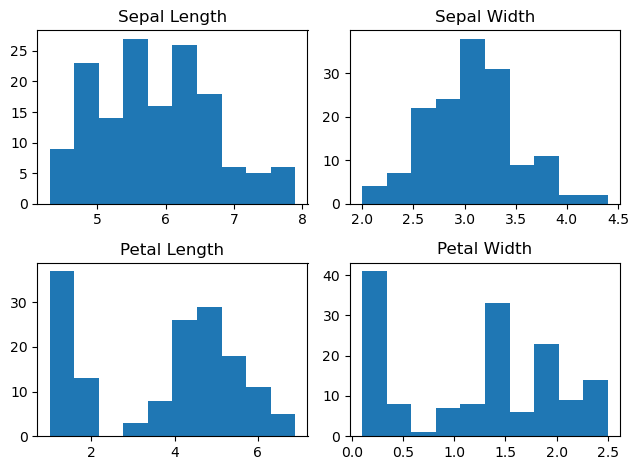

In [5]:
import matplotlib.pyplot as plt

# we can use subplots to add all 4 plots into a single image rather than having to print them individually
fig, axs = plt.subplots(2,2)

axs[0,0].hist(iris_data['sepal length'], bins=10)
axs[0,0].set_title('Sepal Length')
axs[0,1].hist(iris_data['sepal width'], bins=10)
axs[0,1].set_title('Sepal Width')
axs[1,0].hist(iris_data['petal length'], bins=10)
axs[1,0].set_title('Petal Length')
axs[1,1].hist(iris_data['petal width'], bins=10)
axs[1,1].set_title('Petal Width')

plt.tight_layout() # stop the labels overlapping the other plots in the subplot
plt.show()
fig.savefig('./output/iris_data_histogram.png')

From the above plot it shows normal distribution for the Sepal Length and Width, whereas the Petal Length and width appear to be positively skewed. This confirms what the findings from the summary about the values being located in the lower end of the range. Finally lets create a scatter plot for each pair of values. This can be done using the `.scatter()` function from matplotlib, passing each pair of attributes, again using subplots to add all the plots into a single image.

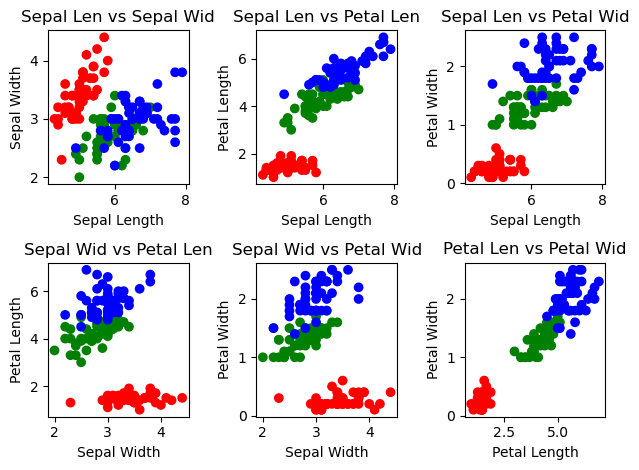

In [6]:
scatter_fig, scatter_axs = plt.subplots(2,3)

colours = {'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'b'}


scatter_axs[0,0].scatter(iris_data['sepal length'], iris_data['sepal width'], c=iris_data['class'].map(colours))
scatter_axs[0,0].set_xlabel('Sepal Length')
scatter_axs[0,0].set_ylabel('Sepal Width')
scatter_axs[0,0].set_title('Sepal Len vs Sepal Wid')


scatter_axs[0,1].scatter(iris_data['sepal length'], iris_data['petal length'], c=iris_data['class'].map(colours))
scatter_axs[0,1].set_xlabel('Sepal Length')
scatter_axs[0,1].set_ylabel('Petal Length')
scatter_axs[0,1].set_title('Sepal Len vs Petal Len')


scatter_axs[0,2].scatter(iris_data['sepal length'], iris_data['petal width'], c=iris_data['class'].map(colours))
scatter_axs[0,2].set_xlabel('Sepal Length')
scatter_axs[0,2].set_ylabel('Petal Width')
scatter_axs[0,2].set_title('Sepal Len vs Petal Wid')


scatter_axs[1,0].scatter(iris_data['sepal width'], iris_data['petal length'], c=iris_data['class'].map(colours))
scatter_axs[1,0].set_xlabel('Sepal Width')
scatter_axs[1,0].set_ylabel('Petal Length')
scatter_axs[1,0].set_title('Sepal Wid vs Petal Len')


scatter_axs[1,1].scatter(iris_data['sepal width'], iris_data['petal width'], c=iris_data['class'].map(colours))
scatter_axs[1,1].set_xlabel('Sepal Width')
scatter_axs[1,1].set_ylabel('Petal Width')
scatter_axs[1,1].set_title('Sepal Wid vs Petal Wid')

scatter_axs[1,2].scatter(iris_data['petal length'], iris_data['petal width'], c=iris_data['class'].map(colours))
scatter_axs[1,2].set_xlabel('Petal Length')
scatter_axs[1,2].set_ylabel('Petal Width')
scatter_axs[1,2].set_title('Petal Len vs Petal Wid')


plt.tight_layout() # stop the labels overlapping the other plots in the subplot
plt.show()

scatter_fig.savefig('./output/iris_data_scatter.png')


The scatter plots above show 2 clusters in every plot, showing that there are 2 classes (Iris-virginica & Iris-Versicolor) of flowers which appear to share similar attributes and one which is unique to the other 2 (Iris-Setosa). From this we can see some correlations between the attributes such as the sepal length and sepal width, this appears to have a moderate negative correlation meaning thath as the length increases the width decreases, and vice versa. In contrast we see a strong positive correlation between the petal length and petal width, meaning as the length increases so does the width, and vice versa.

An interesting thing we see here is that the Iris-versicolor and Iris-virginica are clustered together in all plots which may indicate it being difficult to predict between the 2. So lets see what happens if we try.

Lets try doing a prediction, using the popular library called scikit-learn to do so. We can use a simple Logistic regression to make the prediction. [Api reference](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

But before a prediction can be made copies of the dataframe columns with the class by itself and another with all other attributes are needed.

In [9]:
classes = iris_data['class'] # take just the classes
attributes = iris_data.drop(columns=['class']) # take everything but the classes

print(classes.head())
print(attributes.head())

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object
   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


As we can see our data is now split, so the data is ready to try make a prediction.

A very useful guide on how all of this works can be found on [Scikit-learns documentation](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)

To make a prediction there are 3 simple steps to follow:

1. Fit the data
2. Sample a row
3. Make a prediction!

In [28]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()

logistic_regression.fit(attributes.values, classes) # step 1 - fit the data!

row = attributes.sample(n=1) # step 2 - sample a random row!

prediction = logistic_regression.predict(row.values) # step 3 - make a prediction!

print(f"Prediction: {prediction}")

# lets try to predict a known row versicolor or virginica

versi_row = attributes.iloc[77].values

virgi_row = attributes.iloc[105].values

versi_prediction = logistic_regression.predict([versi_row])
virgi_prediction = logistic_regression.predict([virgi_row])

print(f"versicolor prediction: {versi_prediction}")
print(f"virginica prediction: {virgi_prediction}")

Prediction: ['Iris-versicolor']
versicolor prediction: ['Iris-virginica']
virginica prediction: ['Iris-virginica']


## Conclusions
In conclusion, from the exploration carried out we can say that the Fisher's Iris dataset is quite an easy dataset to work with and learn from. It has a small amount of attributes (4), and only 3 unique classes. We looked at and discussed the distribution of values for each attribute. We also discussed the correlations between variables in our scatterplots. Another finding was that of these 3 classes, 2 classes (Iris-versicolor and Iris-virginica) have some similarities in their attributes and may not be easily distinguishable, whereas the 3rd (Iris-setosa) class being easily distiguishable from the other 2 when analysing the attibutes. As we can see from the predictions above when we deliberately tried to predict a versicolor, but it predicted as a virginica.

## Summary

In summary from this project I have learned the following:

1. How to load and explore data using Pandas,
2. How to create and interpret summaries, histograms and plots,
3. How to write data to output files using Pandas,
4. How to draw conclusions from this data,
5. How to make simple predictions using a Logistic regression, and finally;
6. Plants are cool!

Overall it was an enjoyable experience and I look forward to exploring more complex datasets in the future!

______

## End